In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
# import warnings
# warnings.filterwarnings('ignore')

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

Reading the data 

In [2]:
sales_train = pd.read_csv("./data/sales_train.csv")
items = pd.read_csv("./data/items.csv")
shops = pd.read_csv("./data/shops.csv")
item_category = pd.read_csv("./data/item_categories.csv")
sales_test = pd.read_csv("./data/test.csv")

In [3]:
sales_train.shape

(2935849, 6)

In [4]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


# **Explanatory Data Analysis**

In [5]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [6]:
sales_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


In [7]:
sales_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [8]:
sales_test.describe()

,ID,shop_id,item_id
count,214200.000000,214200.000000,214200.000000
mean,107099.500000,31.642857,11019.398627
std,61834.358168,17.561933,6252.644590
min,0.000000,2.000000,30.000000
25%,53549.750000,16.000000,5381.500000
50%,107099.500000,34.500000,11203.000000
75%,160649.250000,47.000000,16071.500000
max,214199.000000,59.000000,22167.000000


In [9]:
sales_train.corr()

C:\Users\rsury\AppData\Local\Temp\ipykernel_10940\2120454510.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sales_train.corr()


,date_block_num,shop_id,item_id,item_price,item_cnt_day
date_block_num,1.000000,0.019273,0.009356,0.095010,0.009402
shop_id,0.019273,1.000000,0.029396,-0.024034,-0.005230
item_id,0.009356,0.029396,1.000000,-0.134104,0.016650
item_price,0.095010,-0.024034,-0.134104,1.000000,0.011197
item_cnt_day,0.009402,-0.005230,0.016650,0.011197,1.000000


C:\Users\rsury\AppData\Local\Temp\ipykernel_10940\3718005264.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sales_train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


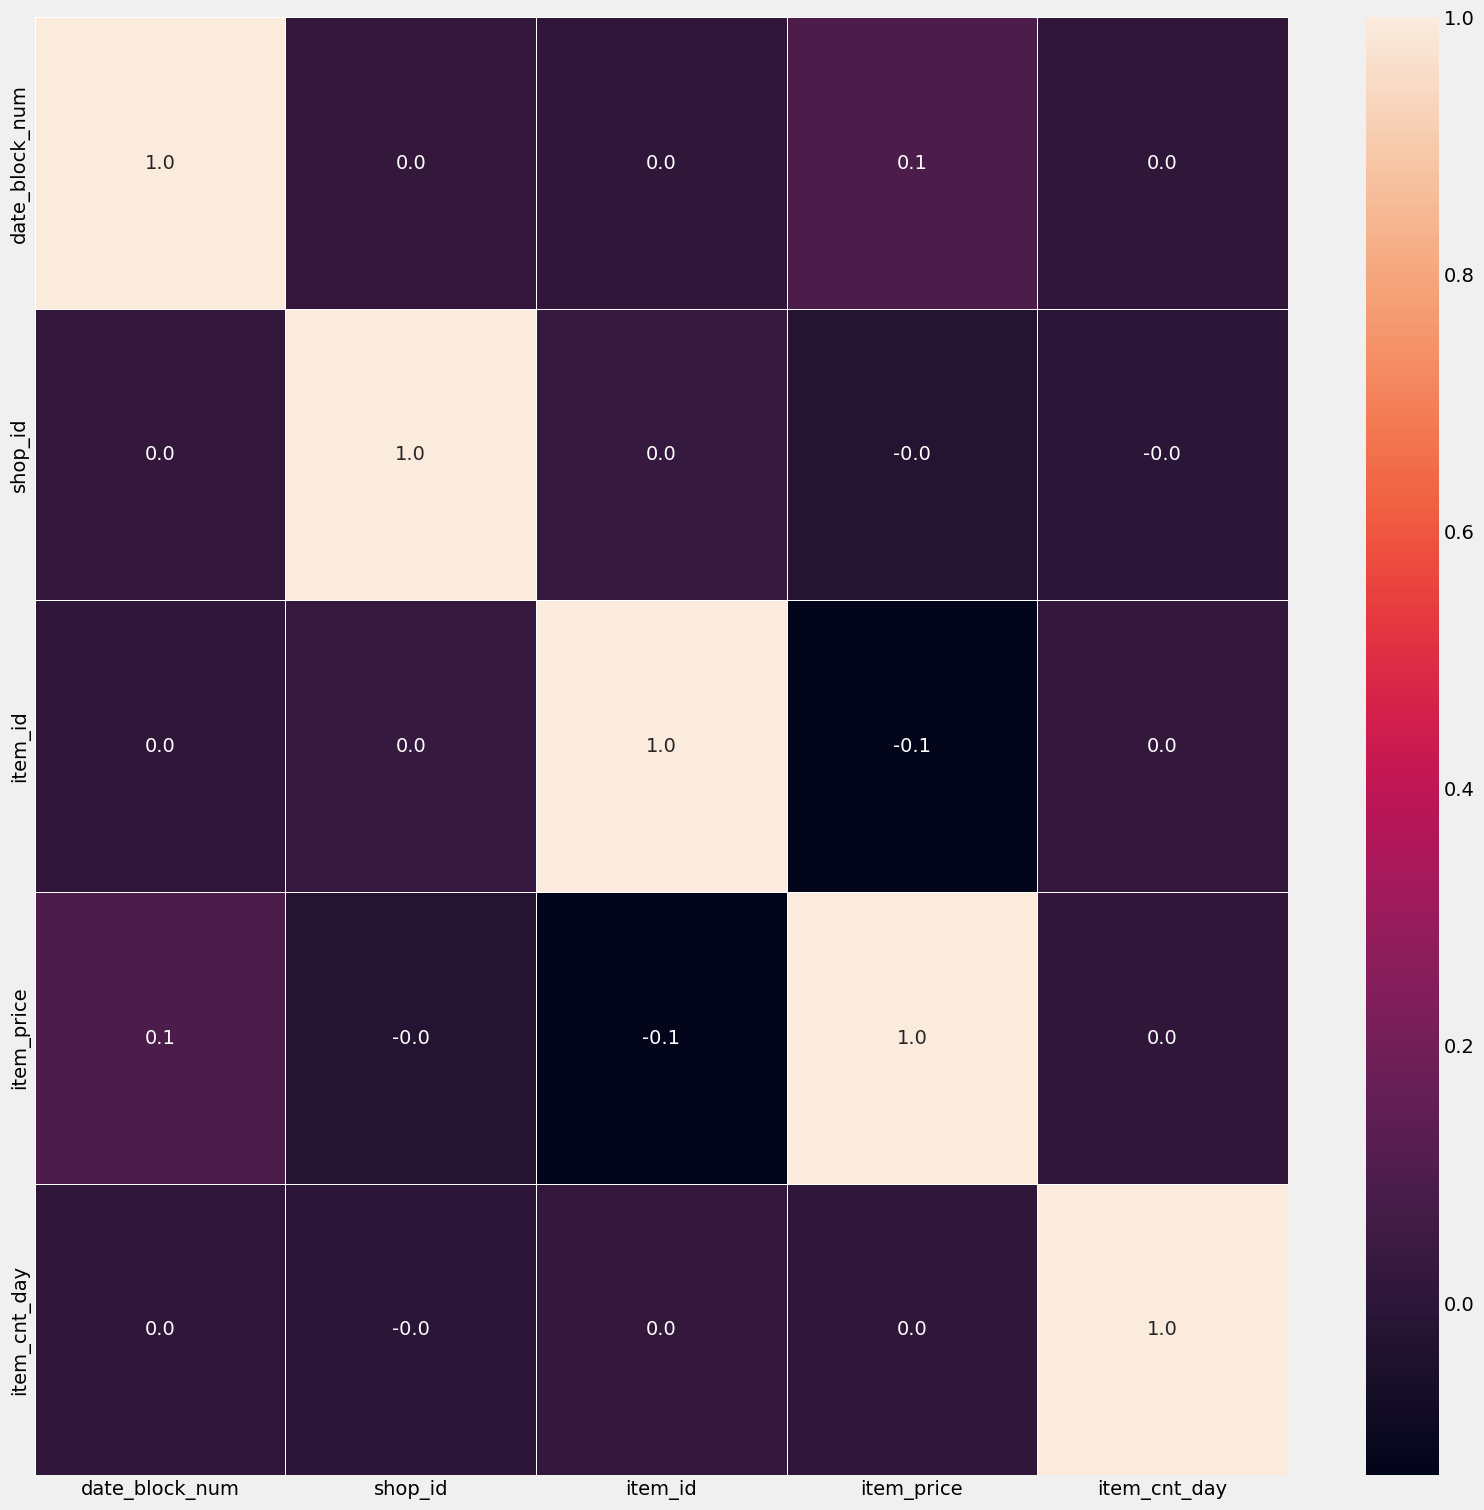

In [63]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(sales_train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

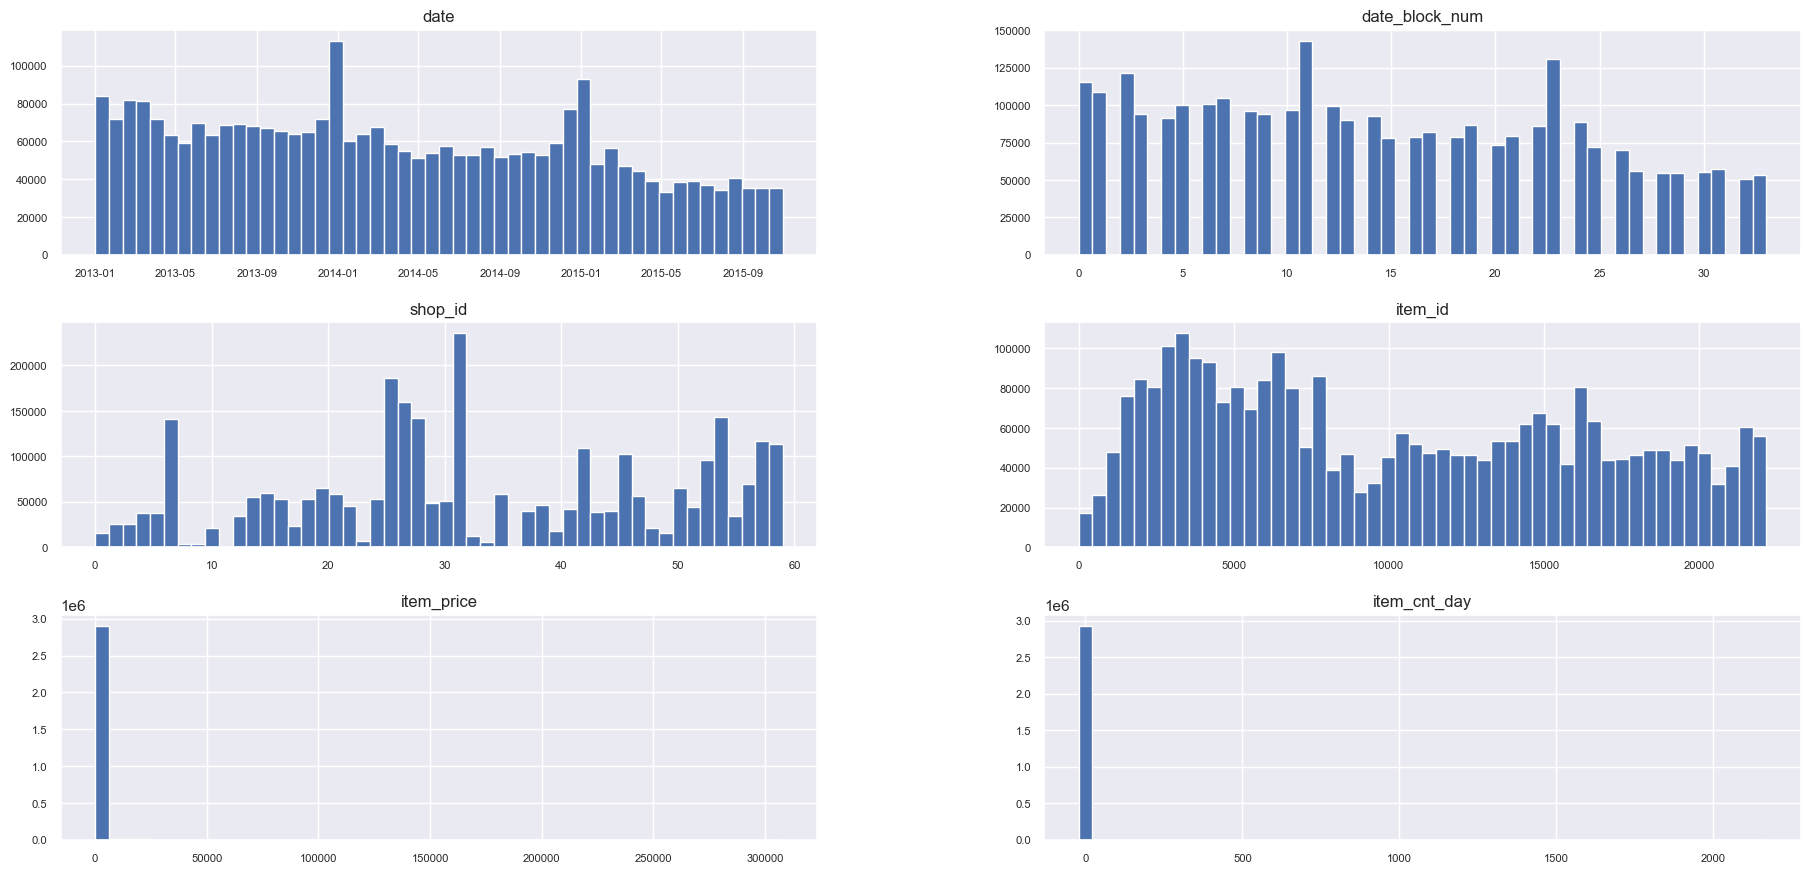

In [66]:
sales_train.hist(bins=50, xlabelsize=8, ylabelsize=8); 

c:\Users\rsury\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


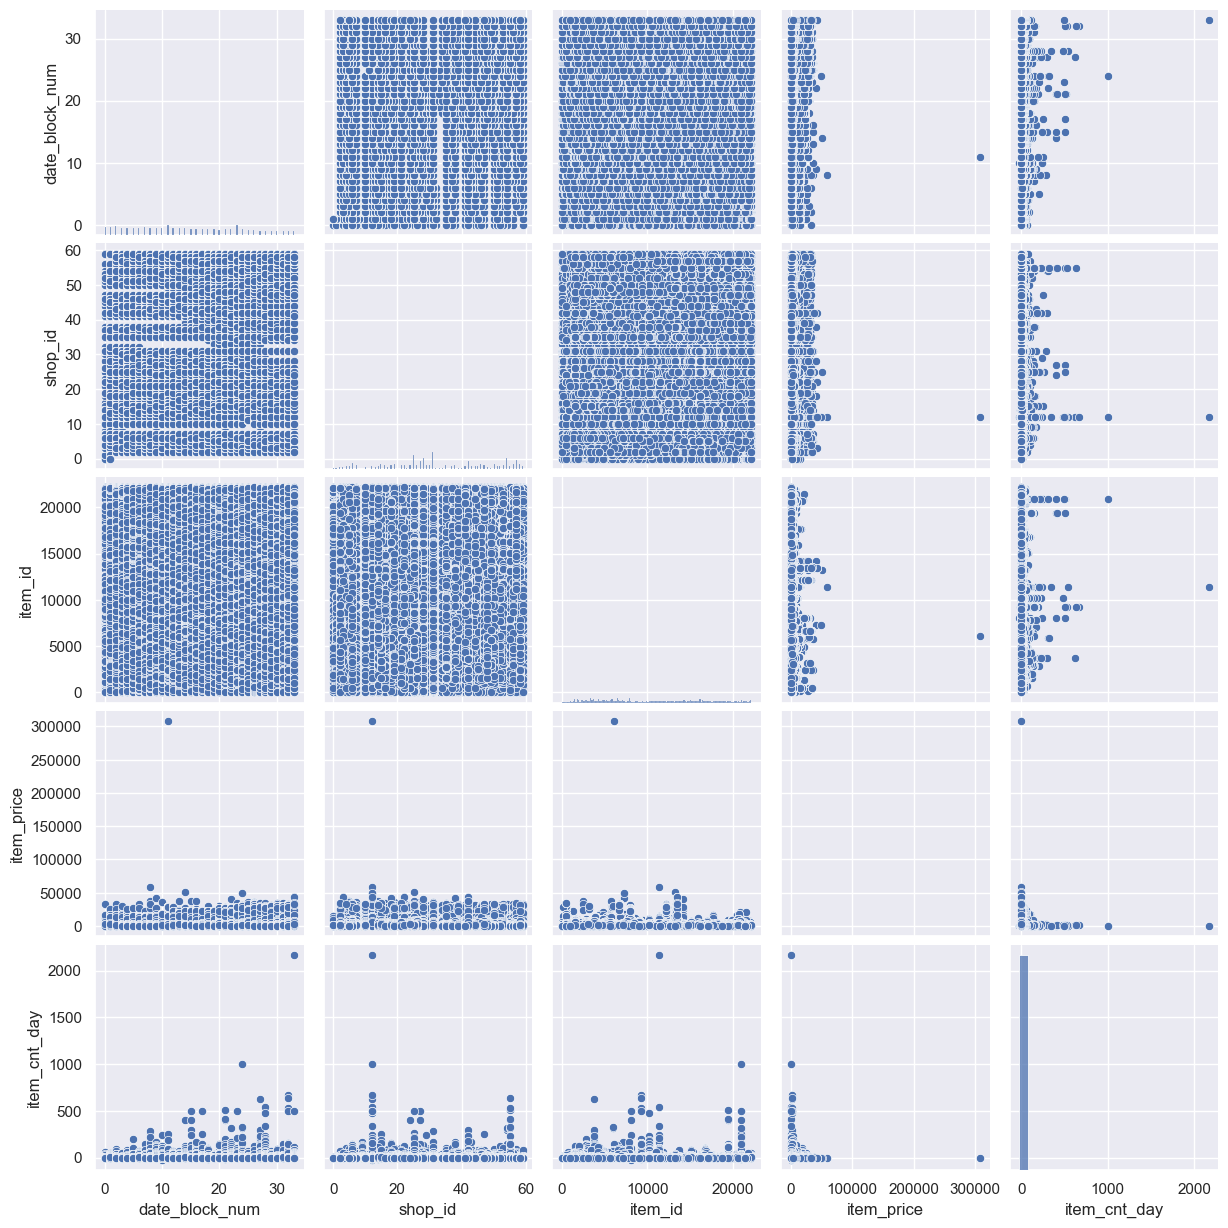

In [65]:
sns.set()
sns.pairplot(sales_train, size = 2.5)
plt.show()

In [10]:
sales_train.isnull().sum() # checking for null values in data

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [11]:
sales_test.isnull().sum()

ID         0
shop_id    0
item_id    0
dtype: int64

In [12]:
sales_train.isna().sum() # checking for NaN values in data

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [13]:
sales_test.isna().sum()

ID         0
shop_id    0
item_id    0
dtype: int64

In [115]:
print(f'No. of Null values in,')
print(f'\t{"Train Dataset":>26} : {sales_train.isnull().sum().sum():^5}')
print(f'\t{"Test Dataset":>26} : {sales_test.isnull().sum().sum():^5}')
print(f'\t{"Item Dataset":>26} : {items.isnull().sum().sum():^5}')
print(f'\t{"Shops Dataset":>26} : {shops.isnull().sum().sum():^5}')
print(f'\t{"Item_categories Dataset":>26} : {item_category.isnull().sum().sum():^5}')

No. of Null values in,
	             Train Dataset :   0  
	              Test Dataset :   0  
	              Item Dataset :   0  
	             Shops Dataset :   0  
	   Item_categories Dataset :   0  


In [14]:
sales_train[sales_train.duplicated()] # duplicate values in the dataset

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
76962,05.01.2013,0,54,20130,149.0,1.0
1435367,23.02.2014,13,50,3423,999.0,1.0
1496766,23.03.2014,14,21,3423,999.0,1.0
1671873,01.05.2014,16,50,3423,999.0,1.0
1866340,12.07.2014,18,25,3423,999.0,1.0
2198566,31.12.2014,23,42,21619,499.0,1.0


In [15]:
print(f'Number of duplicate values in Sales_Train dataset is : {len(sales_train[sales_train.duplicated()])}')

Number of duplicate values in Sales_Train dataset is : 6


In [16]:
sales_test[sales_test.duplicated()] # no duplicates in sales test data

,ID,shop_id,item_id


In [54]:
shops[shops.duplicated()] # no duplicates in shops dataset

,shop_name,shop_id


In [56]:
items[items.duplicated()] # no duplicates in item dataset

,item_name,item_id,item_category_id


In [17]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [18]:
sales_train['date'] = pd.to_datetime(sales_train['date'], format="%d.%m.%Y")

In [20]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [21]:
sales_train.sort_values(by='date', inplace=True)
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
49800,2013-01-01,0,18,5823,2500.0,1.0
29784,2013-01-01,0,27,5573,849.0,1.0
35476,2013-01-01,0,7,1006,399.0,1.0
8330,2013-01-01,0,19,17707,899.0,1.0
57384,2013-01-01,0,14,19548,149.0,1.0


In [22]:
print(f'Date range of the sales Train data from : {sales_train.date.min()} to : {sales_train.date.max()}')
print(f'No. of months of data present in sales train : {len(sales_train.date_block_num.unique())} months')

Date range of the sales Train data from : 2013-01-01 00:00:00 to : 2015-10-31 00:00:00
No. of months of data present in sales train : 34 months


In [23]:
print(f'Price range of sales train dataset: \n\t {"minimum price":^15} : {sales_train.item_price.min():^5}')
print(f'\t {"maxmimum price":^15} : {sales_train.item_price.max():^5}')
print(f'\t {"Average price":^15} : {sales_train.item_price.mean():.2f}')


Price range of sales train dataset: 
	  minimum price  : -1.0 
	 maxmimum price  : 307980.0
	  Average price  : 890.85


In [24]:
df_train = sales_train.merge(items, on='item_id', how='left')
df_test = sales_test.merge(items, on='item_id', how='left')

In [25]:

print(f'{"Unique Shop_ids in the Shops data":^33} : {len(shops.shop_id.unique()):^5}')
print(f'{"Unique Shop_ids in the Train data":>33} : {len(df_train.shop_id.unique()):^5}')
print(f'{"Unique Shop_ids in the Test data":>33} : {len(df_test.shop_id.unique()):^5}')

Unique Shop_ids in the Shops data :  60  
Unique Shop_ids in the Train data :  60  
 Unique Shop_ids in the Test data :  42  


In [26]:
print(f'{"Unique Item_ids in the Shops data":^33} : {len(items.item_id.unique()):^5}')
print(f'{"Unique Item_ids in the Train data":>33} : {len(df_train.item_id.unique()):^5}')
print(f'{"Unique Item_ids in the Test data":>33} : {len(df_test.item_id.unique()):^5}')

Unique Item_ids in the Shops data : 22170
Unique Item_ids in the Train data : 21807
 Unique Item_ids in the Test data : 5100 


In [27]:
print(f'{"Unique Item_Category_ids in the Item Category data":^50} : {len(item_category.item_category_id.unique()):^5}')
print(f'{"Unique Item_Category_ids in the Train data":>50} : {len(df_train.item_category_id.unique()):^5}')
print(f'{"Unique Item_Category_ids in the Test data":>50} : {len(df_test.item_category_id.unique()):^5}')

Unique Item_Category_ids in the Item Category data :  84  
        Unique Item_Category_ids in the Train data :  84  
         Unique Item_Category_ids in the Test data :  62  


# **Outlier Identification - Sales Train dataset**

In [28]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
49800,2013-01-01,0,18,5823,2500.0,1.0
29784,2013-01-01,0,27,5573,849.0,1.0
35476,2013-01-01,0,7,1006,399.0,1.0
8330,2013-01-01,0,19,17707,899.0,1.0
57384,2013-01-01,0,14,19548,149.0,1.0


**Item Price - Outlier**

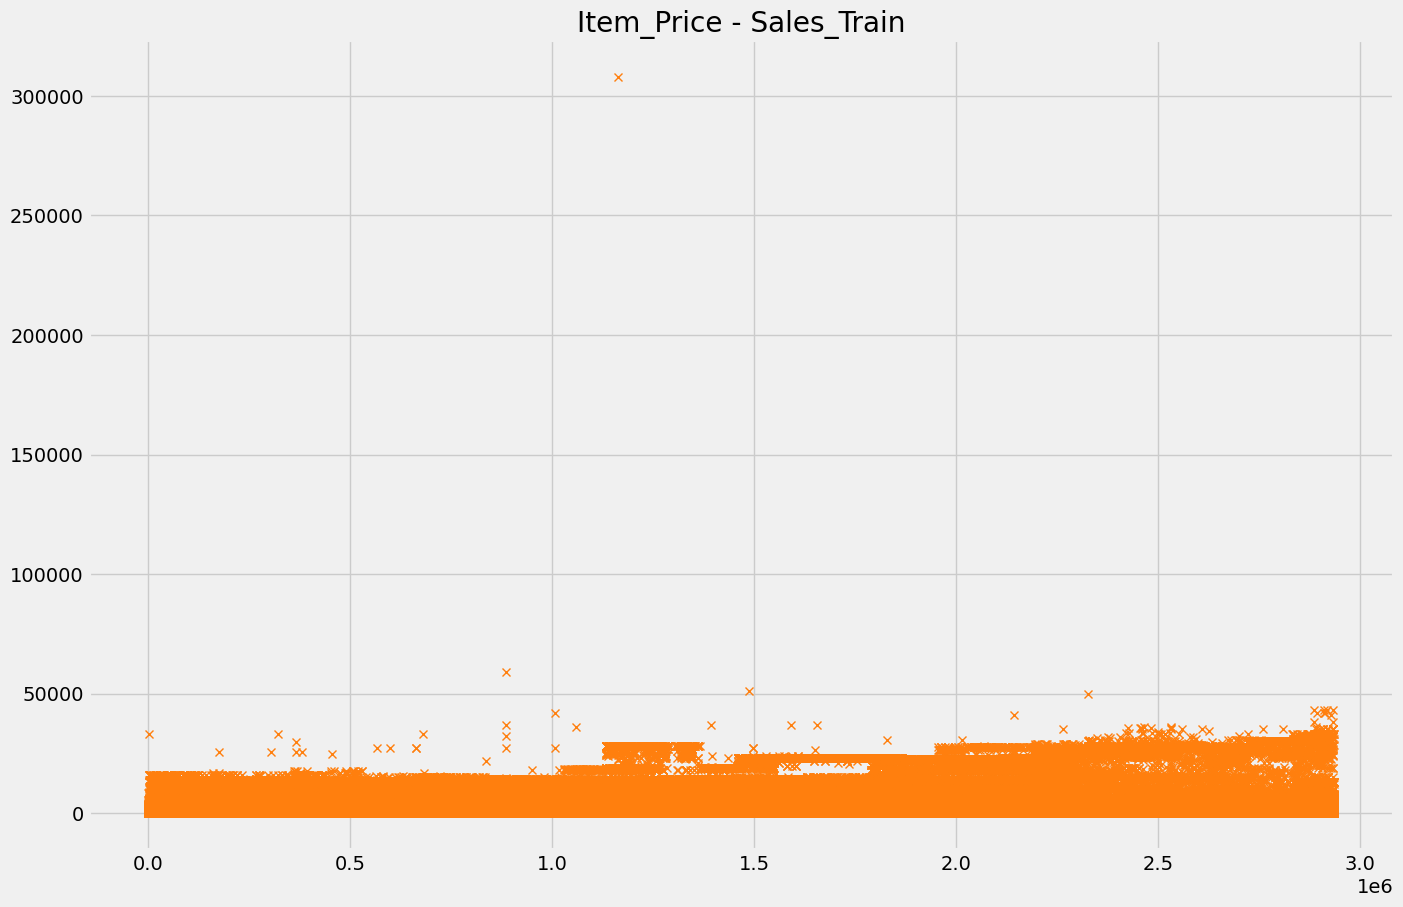

In [29]:
sales_train.item_price.plot(style='x',
        figsize=(15,10),
        color=color_pal[1],
        title='Item_Price - Sales_Train')
plt.show()

In [30]:
sales_train.item_price.sort_values()

484683         -1.0000
579766          0.0700
608763          0.0700
611400          0.0875
673155          0.0900
              ...     
2910156     42990.0000
2327159     49782.0000
1488135     50999.0000
885138      59200.0000
1163158    307980.0000
Name: item_price, Length: 2935849, dtype: float64

**Clearly from the above plot and the sorted values, we can see that the except one item price(index:1163158) all the other prices are less than 60,000.**

In [31]:
sales_train.loc[1163158] # Outliers - item price

date              2013-12-13 00:00:00
date_block_num                     11
shop_id                            12
item_id                          6066
item_price                   307980.0
item_cnt_day                      1.0
Name: 1163158, dtype: object

In [32]:
print(f'Total number of data in the Sales Train: {sales_train.item_cnt_day.count()}')
for i in range(95,101):print(f"{i}percentile value of item price : {np.percentile(sales_train.item_price.values,i)} ")

Total number of data in the Sales Train: 2935849
95percentile value of item price : 2690.0 
96percentile value of item price : 2999.0 
97percentile value of item price : 3190.0 
98percentile value of item price : 3590.0 
99percentile value of item price : 5999.0 
100percentile value of item price : 307980.0 


**99% of the sales train data has price of 5999.0  or less.
Only 1% of the sales train data has price more than 5999.0**

**Outlier - Item Count day**

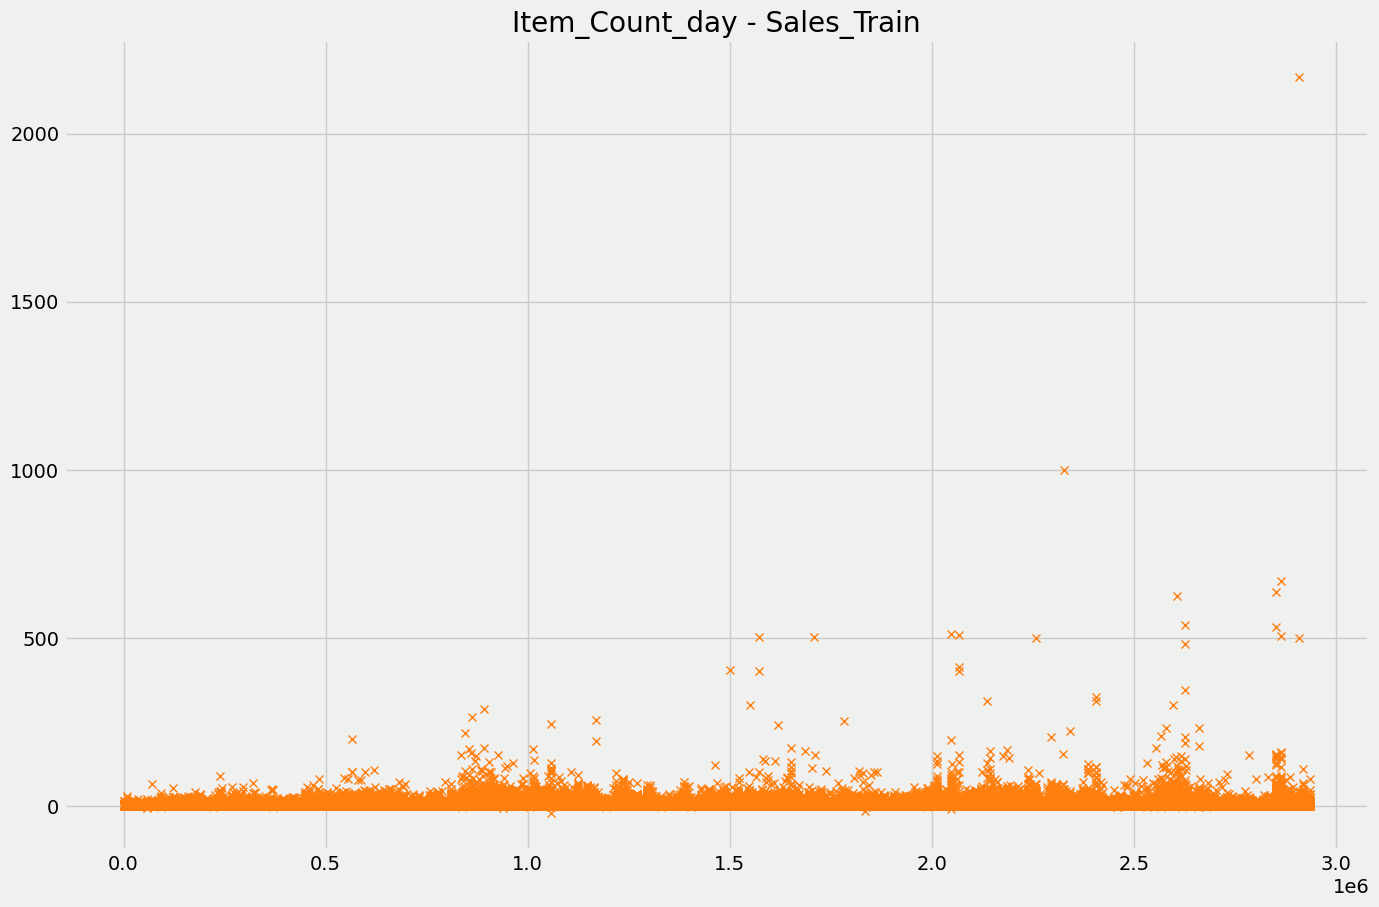

In [33]:
sales_train.item_cnt_day.plot(style='x',
        figsize=(15,10),
        color=color_pal[1],
        title='Item_Count_day - Sales_Train')
plt.show()

In [34]:
sales_train.item_cnt_day.sort_values()

1057907     -22.0
1835454     -16.0
2048519      -9.0
940092       -6.0
59156        -6.0
            ...  
2608040     624.0
2851091     637.0
2864235     669.0
2326930    1000.0
2909818    2169.0
Name: item_cnt_day, Length: 2935849, dtype: float64

**Clearly from the above plot and the sorted values, we can see that the except two values of number of items sold (value : 1000, 2169) on a day (index:2326930,2909818) all the other item counts are less than 700.**

In [35]:
print(f'Total number of data in the Sales Train: {sales_train.item_cnt_day.count()}')
for i in range(95,101):print(f"{i}percentile value of item_cnt_day : {np.percentile(sales_train.item_cnt_day.values,i)} ")

Total number of data in the Sales Train: 2935849
95percentile value of item_cnt_day : 2.0 
96percentile value of item_cnt_day : 2.0 
97percentile value of item_cnt_day : 3.0 
98percentile value of item_cnt_day : 3.0 
99percentile value of item_cnt_day : 5.0 
100percentile value of item_cnt_day : 2169.0 


**99% of the  sales train data has 5 or less item counts per day.
Only 1% of the sales train data has more than 5 item counts per day.**

In [36]:
df_shop = sales_train.groupby(['shop_id'], as_index=0)['item_cnt_day'].sum()
df_shop.head()

,shop_id,item_cnt_day
0,0,11705.0
1,1,6311.0
2,2,30620.0
3,3,28355.0
4,4,43942.0


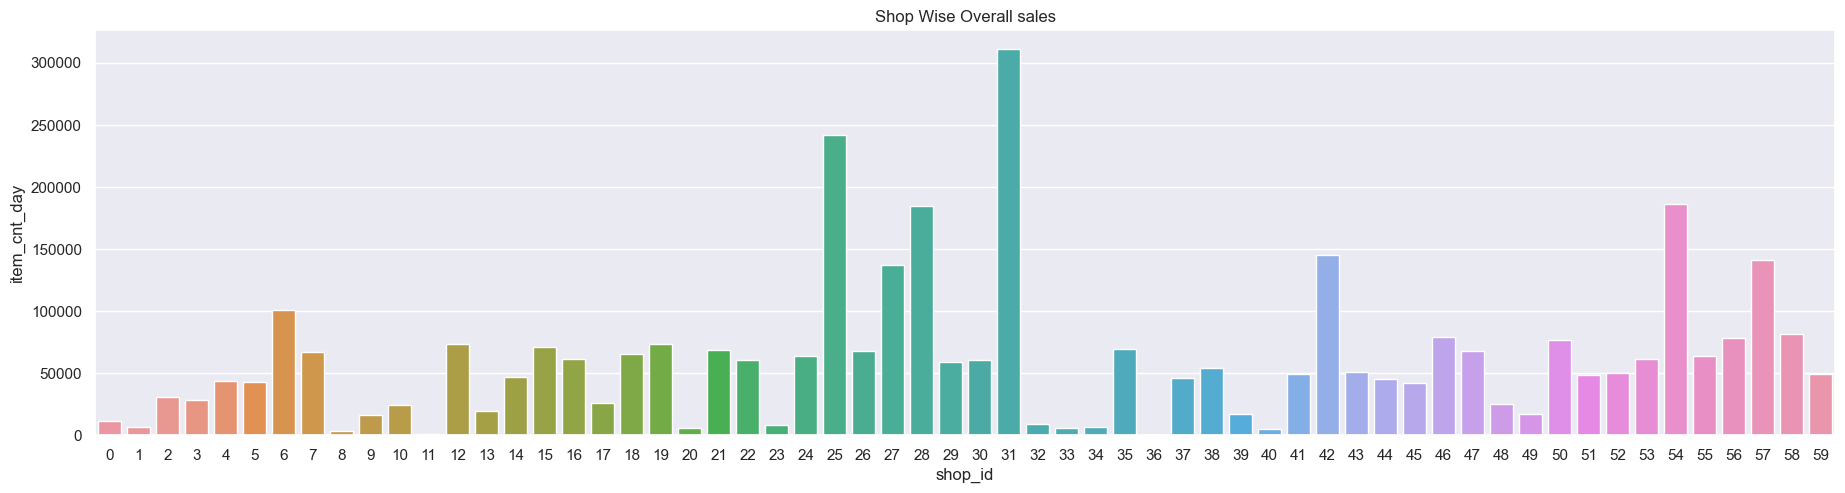

In [68]:
plt.figure(figsize=(20,5))
sns.barplot(x='shop_id', y='item_cnt_day', data=df_shop.sort_values(by='item_cnt_day'))
plt.title('Shop Wise Overall sales')
# plt.legend()
plt.show()

In [38]:
df_item = sales_train.merge(items, on='item_id', how='left')
df_item = df_item.groupby(['item_category_id'], as_index=0)['item_cnt_day'].sum()
df_item.head()

,item_category_id,item_cnt_day
0,0,3.0
1,1,2.0
2,2,19597.0
3,3,29807.0
4,4,2407.0


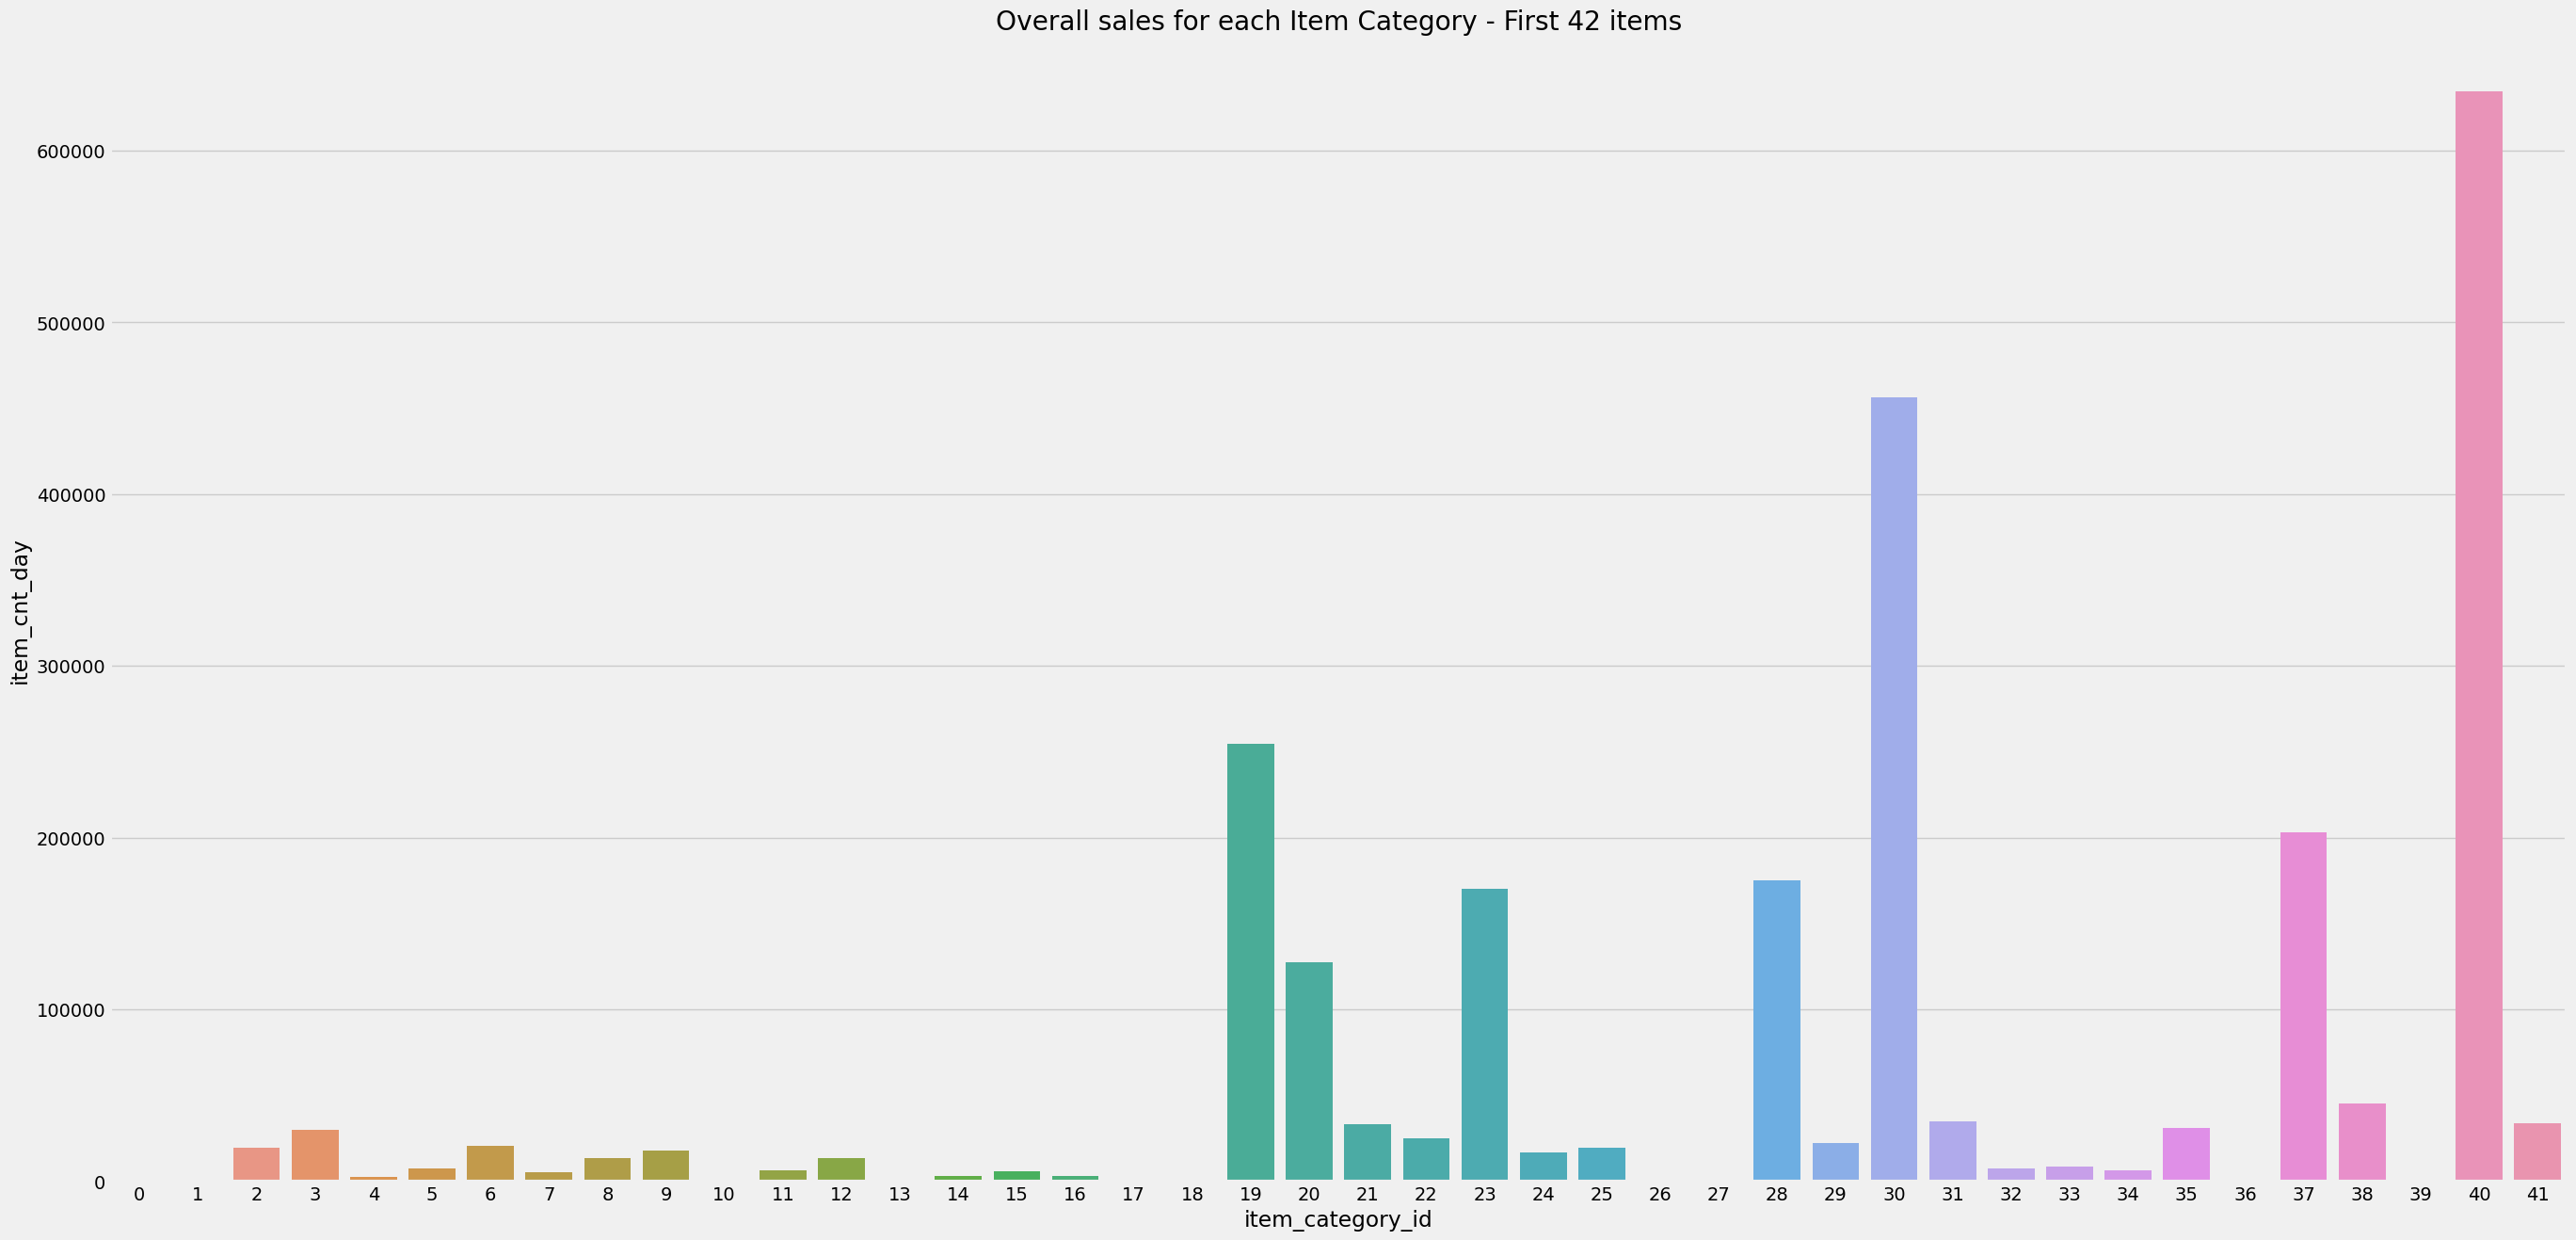

In [39]:
plt.figure(figsize=(30,15))
sns.barplot(x='item_category_id', y='item_cnt_day', data=df_item[:42])
plt.title('Overall sales for each Item Category - First 42 items')
plt.show()

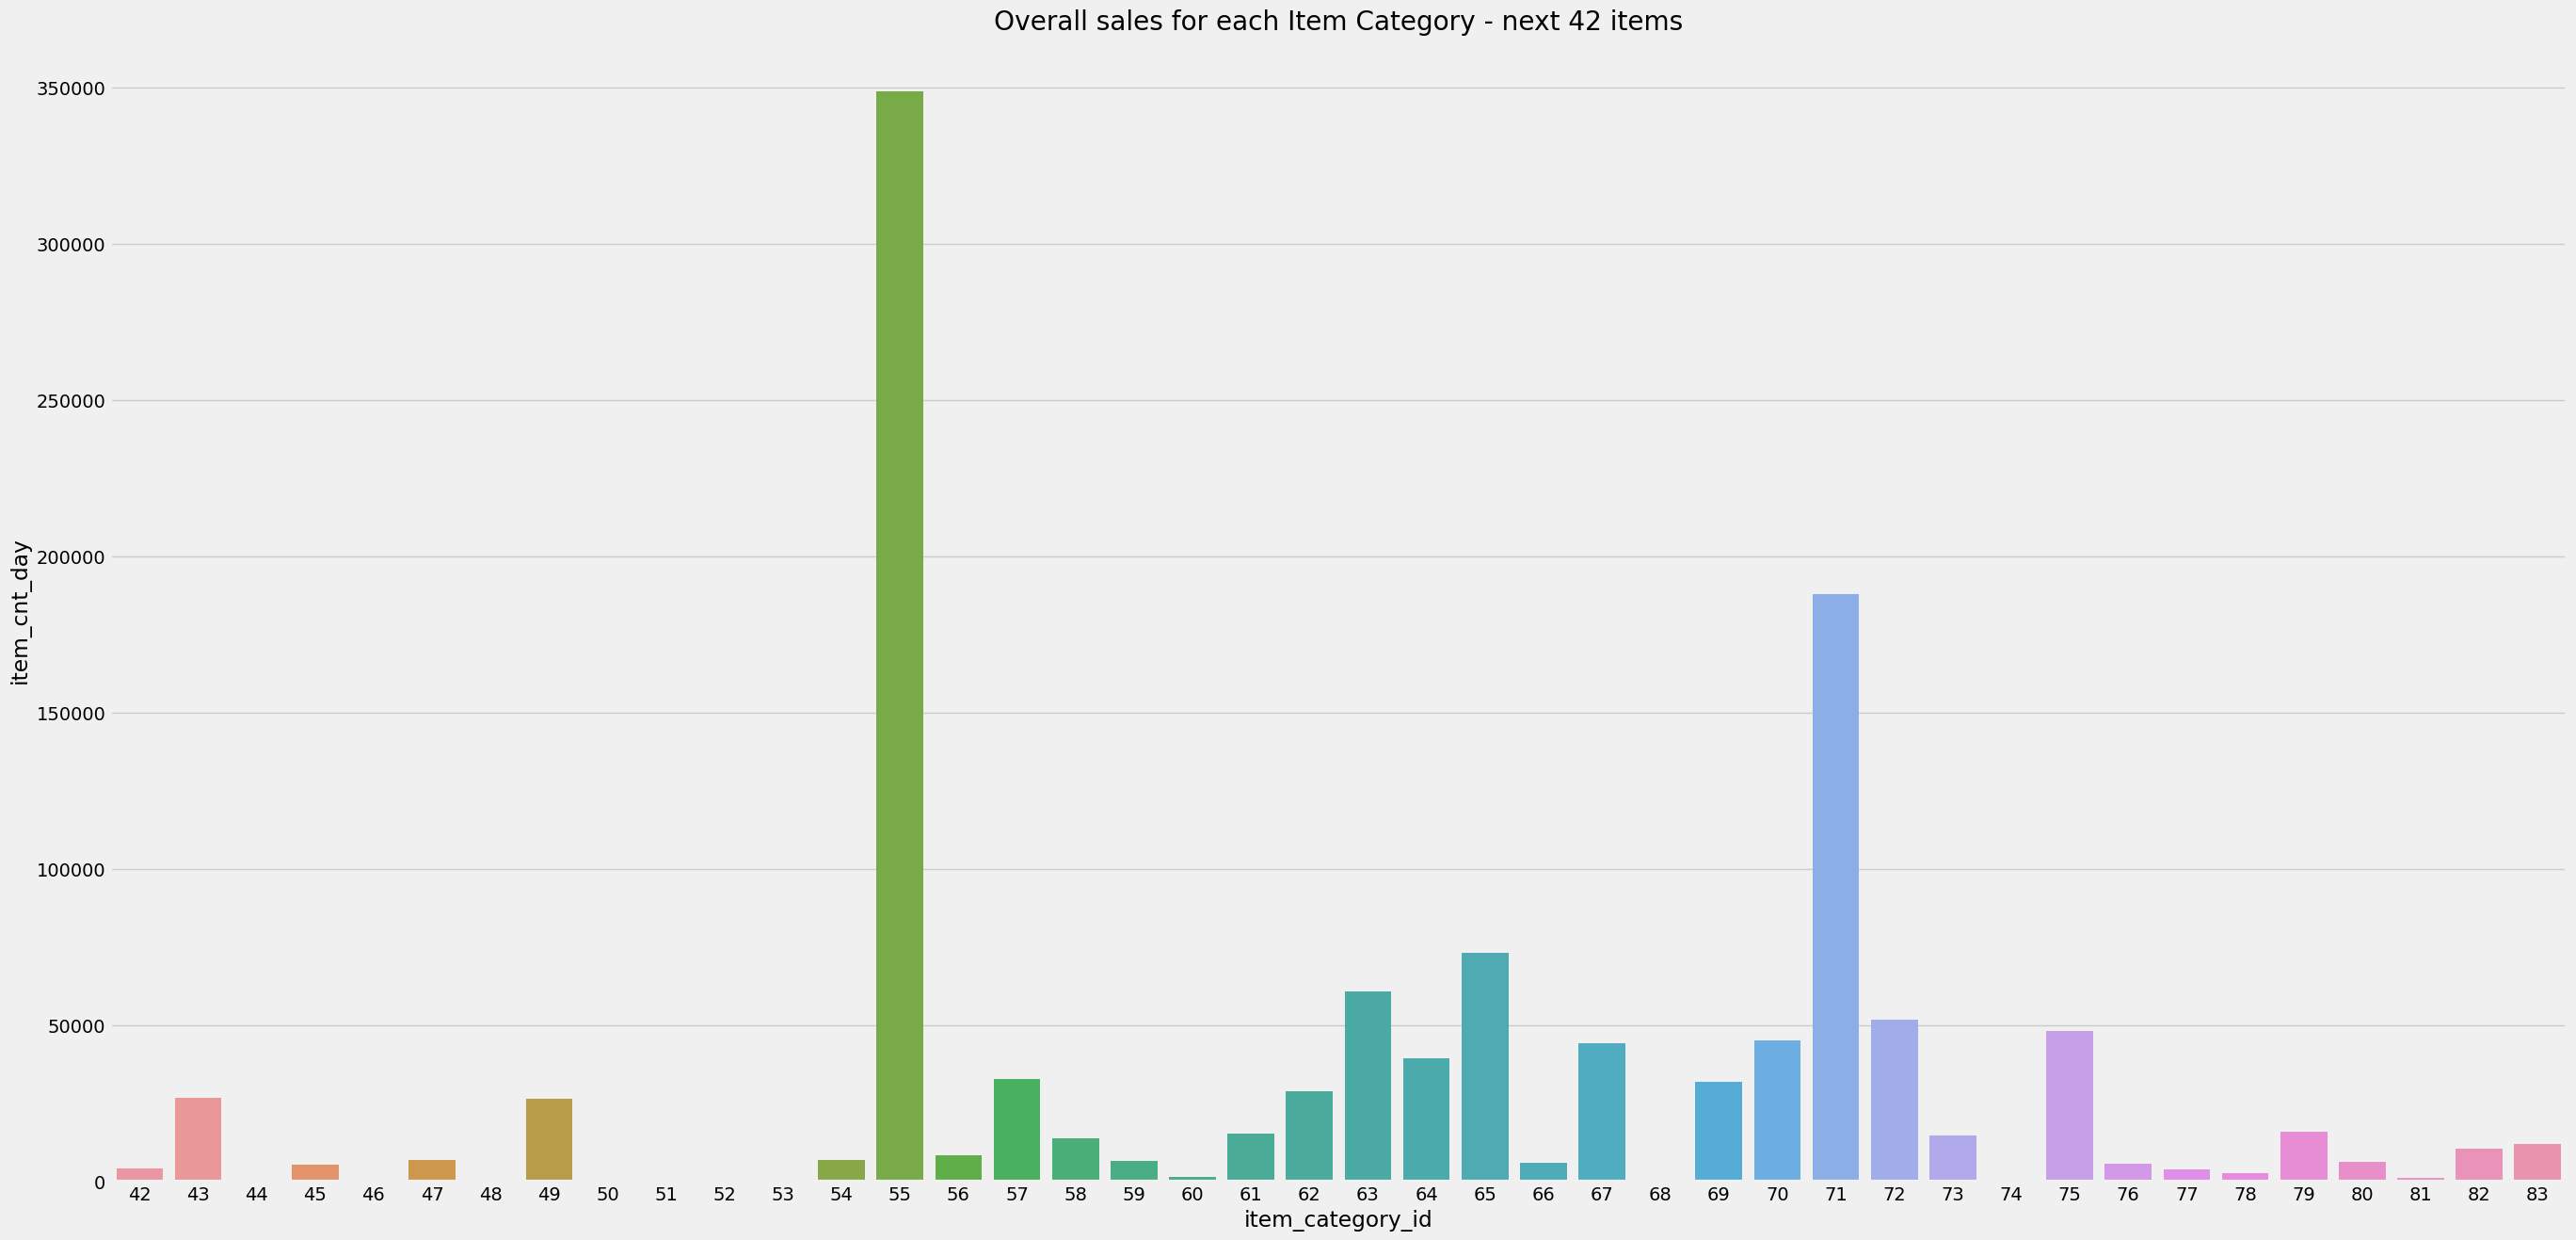

In [40]:
plt.figure(figsize=(30,15))
sns.barplot(x='item_category_id', y='item_cnt_day', data=df_item[42:])
plt.title('Overall sales for each Item Category - next 42 items')
plt.show()

In [41]:
df_sales_month = sales_train.groupby(['date_block_num'], as_index=0)['item_cnt_day'].sum()
df_sales_month.head()

,date_block_num,item_cnt_day
0,0,131479.0
1,1,128090.0
2,2,147142.0
3,3,107190.0
4,4,106970.0


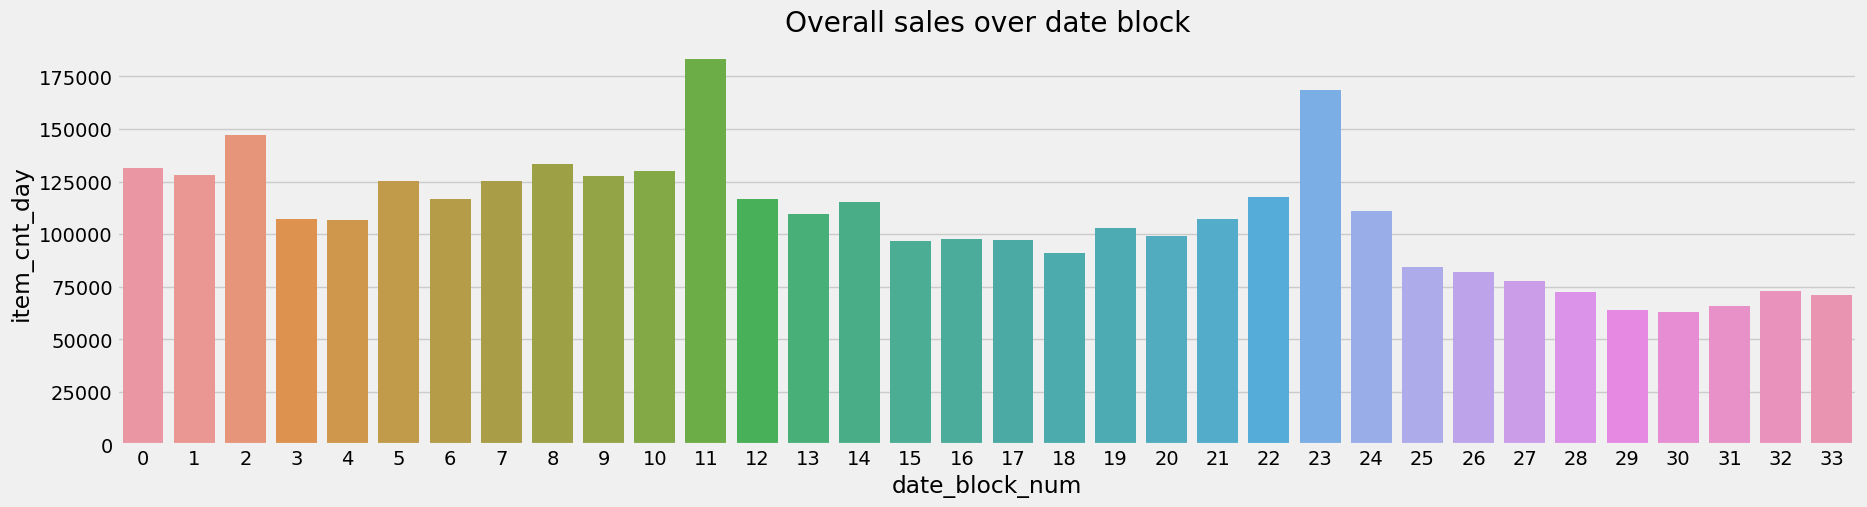

In [42]:
plt.figure(figsize=(20,5))
sns.barplot(x='date_block_num', y='item_cnt_day', data=df_sales_month)
plt.title('Overall sales over date block')
plt.show()
# January 2013 is 0, February 2013 is 1,..., October 2015 is 33

January 2013 is 0, February 2013 is 1,..., October 2015 is 33

In [43]:
sales_cnt_less_than_0 = len(sales_train[sales_train.item_cnt_day < 0])
print(f'Number of days where sales count less than 0 in sales train dataset : {sales_cnt_less_than_0} days')

Number of days where sales count less than 0 in sales train dataset : 7356 days


In [44]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
49800,2013-01-01,0,18,5823,2500.0,1.0
29784,2013-01-01,0,27,5573,849.0,1.0
35476,2013-01-01,0,7,1006,399.0,1.0
8330,2013-01-01,0,19,17707,899.0,1.0
57384,2013-01-01,0,14,19548,149.0,1.0


In [45]:
df_sales_per_month = sales_train.copy()
df_sales_per_month['month'] = pd.to_datetime(df_sales_per_month.date, format="%d.%m.%Y").dt.month
df_sales_per_month = df_sales_per_month.groupby(['month'], as_index=0)['item_cnt_day'].sum()
df_sales_per_month.head()

,month,item_cnt_day
0,1,359349.0
1,2,321975.0
2,3,344453.0
3,4,281573.0
4,5,277055.0


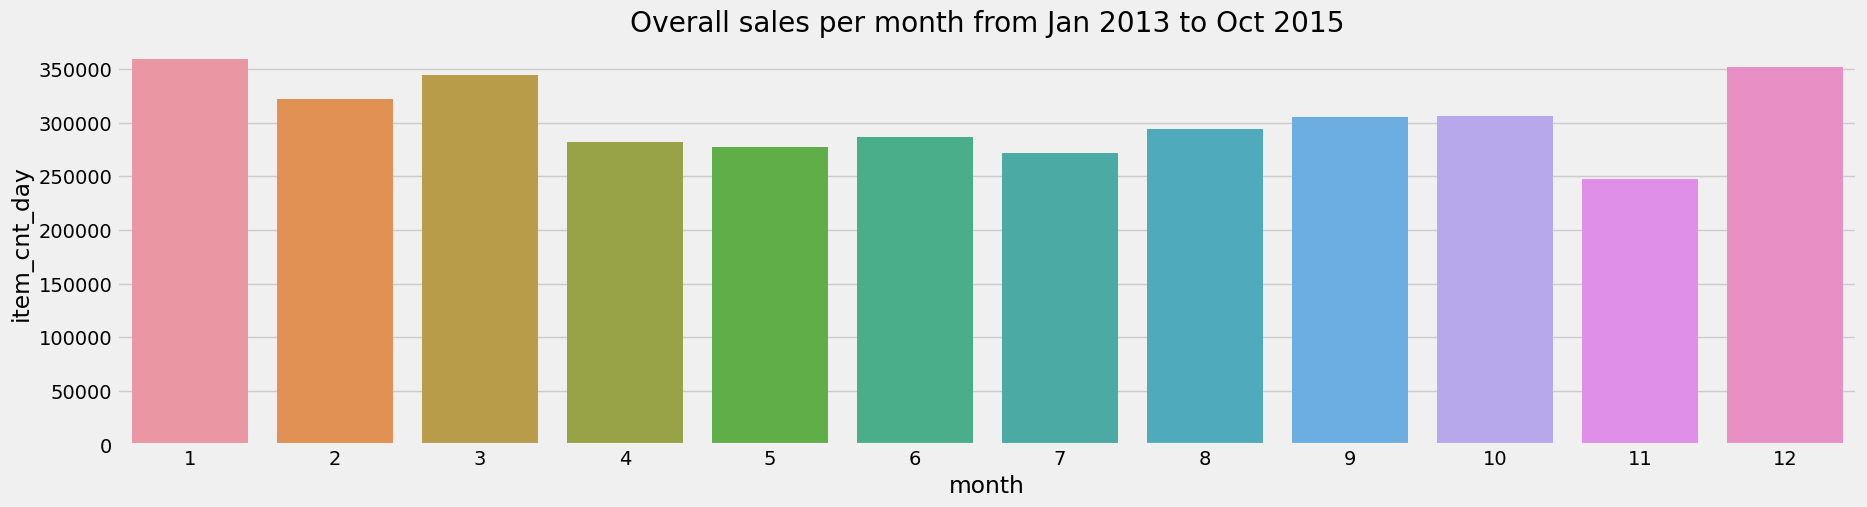

In [46]:
plt.figure(figsize=(20,5))
sns.barplot(x='month', y='item_cnt_day', data=df_sales_per_month)
plt.title('Overall sales per month from Jan 2013 to Oct 2015')
plt.show()

In [47]:
df_sales_per_year = sales_train.copy()
df_sales_per_year['year'] = pd.to_datetime(df_sales_per_year.date, format="%d.%m.%Y").dt.year
df_sales_per_year = df_sales_per_year.groupby(['year'], as_index=0)['item_cnt_day'].sum()
df_sales_per_year.head()

,year,item_cnt_day
0,2013,1562733.0
1,2014,1320889.0
2,2015,764584.0


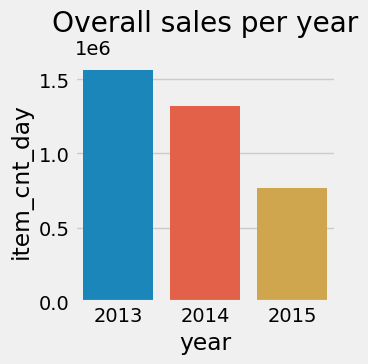

In [48]:
plt.figure(figsize=(3, 3))
sns.barplot(x='year', y='item_cnt_day', data=df_sales_per_year)
plt.title('Overall sales per year')
plt.show()

In [85]:
df_sales_data = sales_train.copy()
df_sales_data['month'] = df_sales_data.date.dt.month
df_sales_data['year'] = df_sales_data.date.dt.year

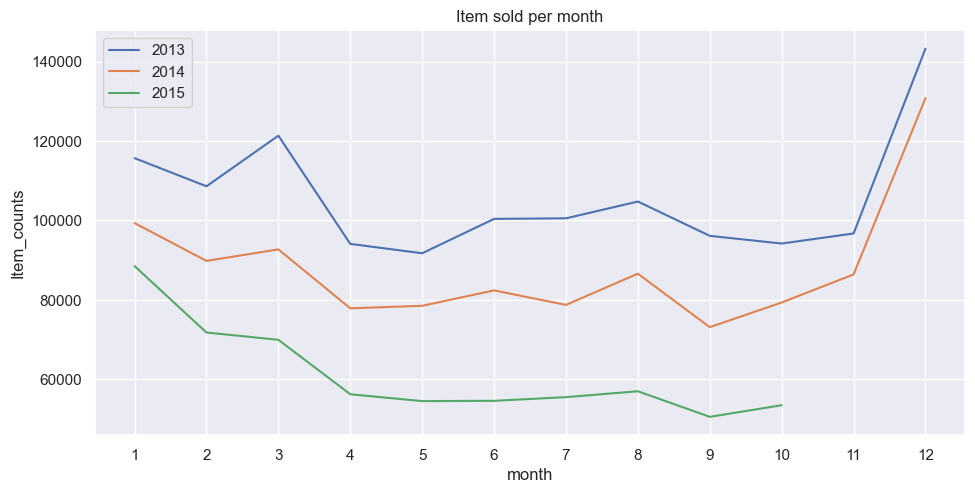

In [95]:
fig, ax = plt.subplots(figsize=(10,5))
plt.xticks([i for i in range(1,13)])
df_sales_data.groupby(df_sales_data[df_sales_data.year==2013].month).count()['item_id'].plot(ax=ax, label=2013)
df_sales_data.groupby(df_sales_data[df_sales_data.year==2014].month).count()['item_id'].plot(label=2014)
df_sales_data.groupby(df_sales_data[df_sales_data.year==2015].month).count()['item_id'].plot(label=2015)
plt.ylabel('Item_counts')
plt.title("Item sold per month")
plt.legend()
plt.show()